In [1]:
import pandas as pd

FILE = "food_claims_2212_1.csv"


# Read the CSV file into a DataFrame
df = pd.read_csv(FILE, index_col=None)

print("DATA:\n", df)

DATA:
       claim_id  time_to_close claim_amount  amount_paid   location  \
0            1            317  R$ 74474.55     51231.37     RECIFE   
1            2            195  R$ 52137.83     42111.30  FORTALEZA   
2            3            183   R$ 24447.2     23986.30   SAO LUIS   
3            4            186  R$ 29006.28     27942.72  FORTALEZA   
4            5            138   R$ 19520.6     16251.06     RECIFE   
...        ...            ...          ...          ...        ...   
1995      1996            176   R$ 28982.3     24265.02     RECIFE   
1996      1997            166   R$ 5188.44      4772.77  FORTALEZA   
1997      1998            179  R$ 11975.85     10087.81     RECIFE   
1998      1999            162  R$ 23516.28     23310.24     RECIFE   
1999      2000            150    R$ 8051.4      6417.92     RECIFE   

      individuals_on_claim linked_cases      cause  
0                       15        False    unknown  
1                       12         True    unk

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nCOLUMNS MISSING VALUES:\n", missing_values)


COLUMNS MISSING VALUES:
 claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


In [3]:
# Print the data types of all columns
column_types = df.dtypes
print("\nCOLUMNS TYPES:\n", column_types)


COLUMNS TYPES:
 claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object


In [8]:
unique_values_on_claim_id = df['claim_id'].unique()
print("Unique values in claim_id column:", unique_values_on_claim_id, len(unique_values_on_claim_id))

unique_values_on_claim_time_to_close = df['time_to_close'].unique()
print("Unique values in time_to_close column:", unique_values_on_claim_time_to_close, len(unique_values_on_claim_time_to_close))

unique_values_on_claim_amount = df['claim_amount'].unique()
print("Unique values in claim_amount column:", unique_values_on_claim_amount, len(unique_values_on_claim_amount))

unique_values_on_amount_paid = df['amount_paid'].unique()
print("Unique values in amount_paid column:", unique_values_on_amount_paid, len(unique_values_on_amount_paid))

unique_values_on_location = df['location'].unique()
print("Unique values in location column:", unique_values_on_location, len(unique_values_on_location))

unique_values_on_individuals_on_claim = df['individuals_on_claim'].unique()
print("Unique values in individuals_on_claim column:", unique_values_on_individuals_on_claim, len(unique_values_on_individuals_on_claim))

unique_values_on_linked_cases = df['linked_cases'].unique()
print("Unique values in linked_cases column:", unique_values_on_linked_cases, len(unique_values_on_linked_cases))

unique_values_on_cause = df['cause'].unique()
print("Unique values in cause column:", unique_values_on_cause, len(unique_values_on_cause))

Unique values in claim_id column: [   1    2    3 ... 1998 1999 2000] 2000
Unique values in time_to_close column: [317 195 183 186 138 190 149 180 208 175 223 265 235 229 189 204 129 167
 119 177 170 148 173 184 172 237 262 136 181 161 146 243 233 125 166 178
 111 168 301 192 250 185 140 248 196 130 179 290 215 182 159 105 188 109
 267 142 276 293 226 187 153 132 157 144 200 199 156 165 273 120 247 280
 238 134 176 359 160 355 297 245 126 127 108 218 118 102 143 133 227 214
 358 163 234 115 139 171 210 158 240 145 322 228 155 124 162 207 256 174
 194 131 212 246 169 230 217 292 345 219 225 164 152 203 213 137 197 261
 224 206 193 141 325 220 244 318 135 277 254  84 191 104 121 259 202 341
 198 231 232 211 275 110  76 222 257 113 499 274 216 270 205 221 299 260
 272 151  98 326 367 352 294  95 360 370 123 453 327 279 249 117 241 307
 384 147 419 310 209 285 316 106 286 122 253 116 268 320 107 101 201 281
 313 150 271 284 251 295 154  93 329 291 287 255 406 263 350 100 518  90
 264 300 3

In [12]:
#Fix the amount paid values with the median and round it
median = df['amount_paid'].median()
print("Median: ", median)

df['amount_paid'].fillna( 20105.70, inplace=True)
df['amount_paid'].astype(float).round(2)

unique_values_on_amount_paid = df['amount_paid'].unique()
print("Unique values in amount_paid column:", unique_values_on_amount_paid, len(unique_values_on_amount_paid))

Median:  20105.7
Unique values in amount_paid column: [51231.37 42111.3  23986.3  ... 10087.81 23310.24  6417.92] 1964


In [14]:
# Check if all values in the 'amount' column are positive
all_positive = (df['time_to_close'] > 0).all()

if all_positive:
    print("All values in the 'time_to_close' column are positive.")
else:
    print("The 'time_to_close' column contains non-positive values.")

All values in the 'time_to_close' column are positive.


In [15]:
# Check if all values in the 'amount' column are positive
all_positive = (df['individuals_on_claim'] > 0).all()

if all_positive:
    print("All values in the 'individuals_on_claim' column are positive.")
else:
    print("The 'individuals_on_claim' column contains non-positive values.")

All values in the 'individuals_on_claim' column are positive.


In [16]:
#Fix the claim amount column
df['claim_amount'] = df['claim_amount'].replace('[R$,]', '', regex=True).astype(float).round(2)
print(df)

      claim_id  time_to_close  claim_amount  amount_paid   location  \
0            1            317      74474.55     51231.37     RECIFE   
1            2            195      52137.83     42111.30  FORTALEZA   
2            3            183      24447.20     23986.30   SAO LUIS   
3            4            186      29006.28     27942.72  FORTALEZA   
4            5            138      19520.60     16251.06     RECIFE   
...        ...            ...           ...          ...        ...   
1995      1996            176      28982.30     24265.02     RECIFE   
1996      1997            166       5188.44      4772.77  FORTALEZA   
1997      1998            179      11975.85     10087.81     RECIFE   
1998      1999            162      23516.28     23310.24     RECIFE   
1999      2000            150       8051.40      6417.92     RECIFE   

      individuals_on_claim linked_cases      cause  
0                       15        False    unknown  
1                       12         True  

In [17]:
#Fix the amount paid values with the median and round it
median = df['amount_paid'].median()
print("Median: ", median)

df['amount_paid'].fillna( median, inplace=True)
df['amount_paid'].astype(float).round(2)

#Fix the linked cases with false
df['linked_cases'].fillna( False, inplace=True)

#Check for missing values
missing_values = df.isnull().sum()
print("\nCOLUMNS MISSING VALUES:\n", missing_values)

Median:  20105.7

COLUMNS MISSING VALUES:
 claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


Number of claims per location:
 RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64


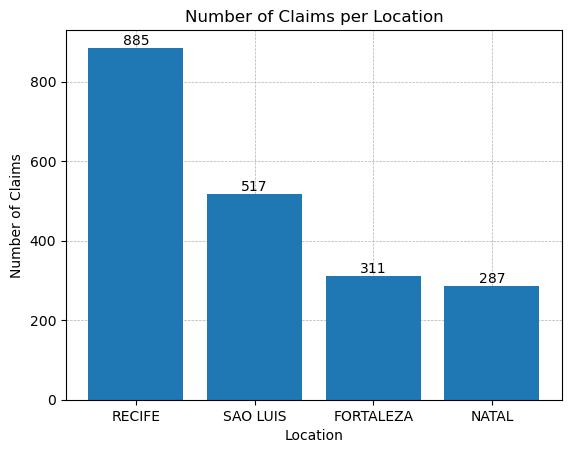

In [19]:
import matplotlib.pyplot as plt

# Get the number of claims per location
claims_per_location = df['location'].value_counts()
print("Number of claims per location:\n", claims_per_location)

plt.bar(claims_per_location.index, claims_per_location.values)
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims per Location')
plt.grid(True, linestyle='--', linewidth=0.5, zorder=0)
plt.gca().set_axisbelow(True)  # Push the grid to the background
for i, v in enumerate(claims_per_location.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

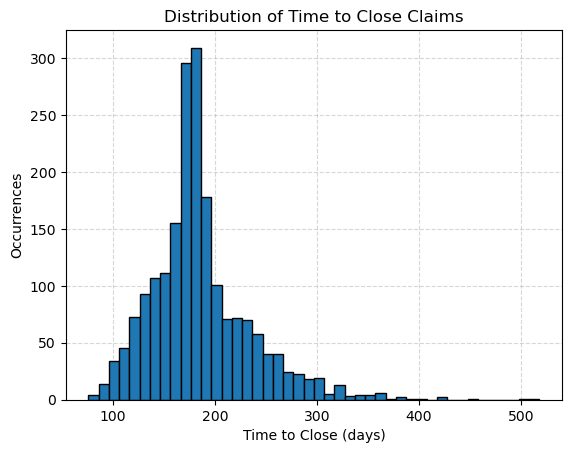

In [26]:
# Calculate the number of bins as the square root of the number of rows
num_bins = int(df.shape[0] ** 0.5)

# Create the histogram
plt.hist(df['time_to_close'], bins=num_bins, edgecolor='black')

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Occurrences')
plt.title('Distribution of Time to Close Claims')

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the histogram
plt.show()

In [28]:
print(179+1.5*(204-158))

248.0


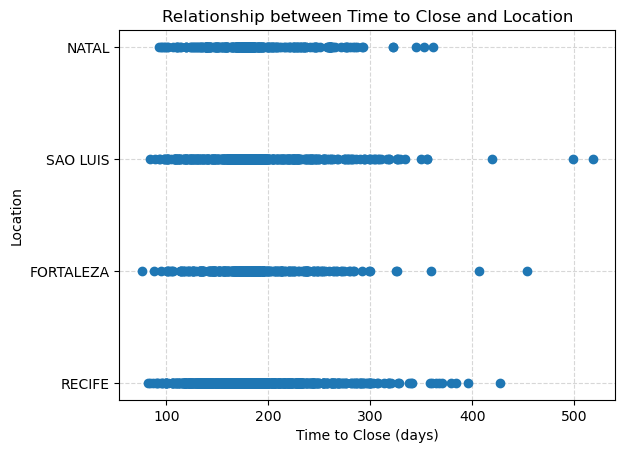

In [29]:
plt.show()
# Create the scatter plot
plt.scatter(df['time_to_close'], df['location'])

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Location')
plt.title('Relationship between Time to Close and Location')

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the scatter plot
plt.show()

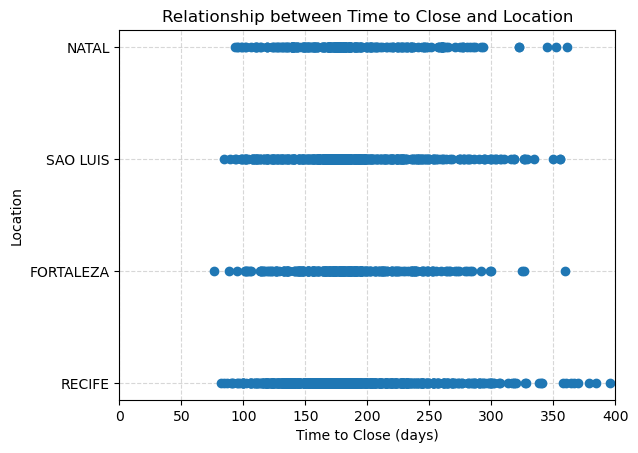

In [30]:
plt.scatter(df['time_to_close'], df['location'])

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Location')
plt.title('Relationship between Time to Close and Location')

# Set x-axis limits
plt.xlim(0, 400)

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the scatter plot
plt.show()

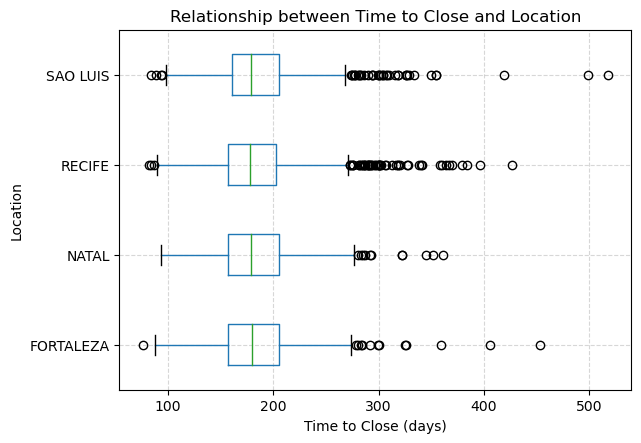

In [32]:
# Create the box plots
box_plot = df.boxplot(column='time_to_close', by='location', vert=False)

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Location')
plt.title('Relationship between Time to Close and Location')

# Remove the default title generated by boxplot
plt.suptitle("")

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the box plots
plt.show()

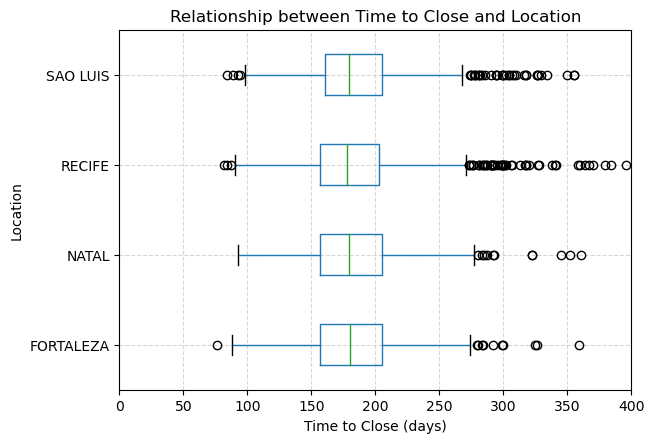

In [33]:
# Create the box plots
box_plot = df.boxplot(column='time_to_close', by='location', vert=False)

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Location')
plt.title('Relationship between Time to Close and Location')

# Set x-axis limits
plt.xlim(0, 400)

# Remove the default title generated by boxplot
plt.suptitle("")

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the box plots
plt.show()

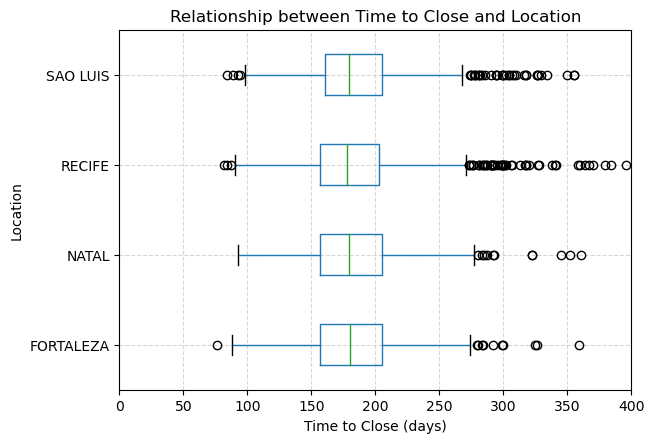

In [35]:
df_filtered = df[df['time_to_close'] <= 400]

# Create the box plots
box_plot = df.boxplot(column='time_to_close', by='location', vert=False)

# Set labels and title
plt.xlabel('Time to Close (days)')
plt.ylabel('Location')
plt.title('Relationship between Time to Close and Location')

# Set x-axis limits
plt.xlim(0, 400)

# Remove the default title generated by boxplot
plt.suptitle("")

# Display the grid and push it to the background
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_axisbelow(True)

# Show the box plots
plt.show()

In [36]:
plt.show()
# Calculate the distribution of time to close for each location
distribution = df.groupby('location')['time_to_close'].describe()

# Create empty columns for count within percentile ranges
distribution['0-25 percentile count'] = 0
distribution['25-50 percentile count'] = 0
distribution['50-75 percentile count'] = 0
distribution['75-100 percentile count'] = 0

# Iterate over each location and calculate count within percentile ranges
for location in distribution.index:
    location_data = df.loc[df['location'] == location, 'time_to_close']
    count_0_25 = location_data[location_data <= distribution.loc[location, '25%']].count()
    count_25_50 = location_data[(location_data > distribution.loc[location, '25%']) & (
                location_data <= distribution.loc[location, '50%'])].count()
    count_50_75 = location_data[(location_data > distribution.loc[location, '50%']) & (
                location_data <= distribution.loc[location, '75%'])].count()
    count_75_100 = location_data[location_data > distribution.loc[location, '75%']].count()
    distribution.loc[location, '0-25 percentile count'] = count_0_25
    distribution.loc[location, '25-50 percentile count'] = count_25_50
    distribution.loc[location, '50-75 percentile count'] = count_50_75
    distribution.loc[location, '75-100 percentile count'] = count_75_100

# Calculate the total count of claims per location
distribution['Total count'] = distribution['count']

# Print the resulting distribution with additional columns
print("Distribution of Time to Close per Location:")
print(distribution)

Distribution of Time to Close per Location:
           count        mean        std   min    25%    50%    75%    max  \
location                                                                    
FORTALEZA  311.0  185.305466  47.583000  76.0  157.0  180.0  205.5  453.0   
NATAL      287.0  185.926829  47.059160  93.0  157.0  179.0  205.5  361.0   
RECIFE     885.0  184.607910  48.013254  82.0  157.0  178.0  203.0  427.0   
SAO LUIS   517.0  187.170213  53.126094  84.0  161.0  179.0  205.0  518.0   

           0-25 percentile count  25-50 percentile count  \
location                                                   
FORTALEZA                     79                      81   
NATAL                         74                      72   
RECIFE                       225                     235   
SAO LUIS                     135                     124   

           50-75 percentile count  75-100 percentile count  Total count  
location                                                  

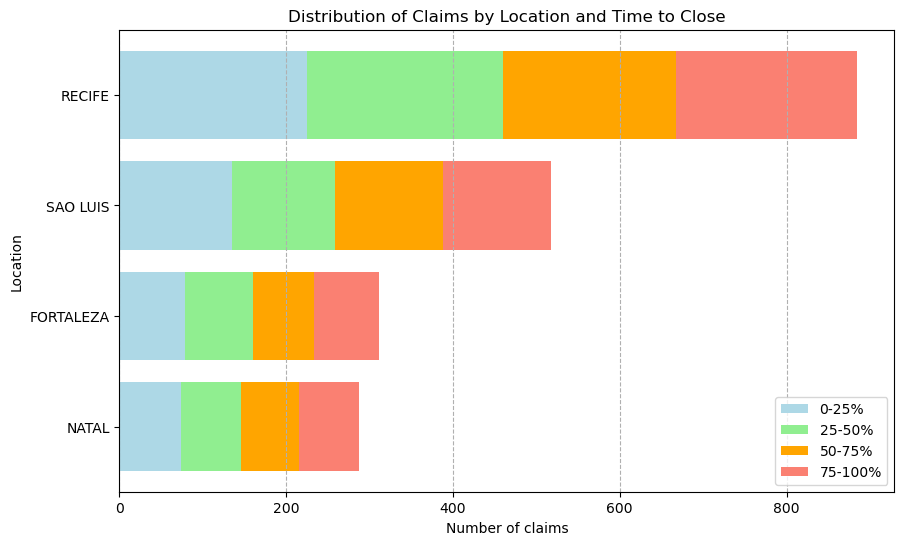

In [38]:
# Sort the distribution DataFrame by the total count in descending order
distribution = distribution.sort_values('Total count', ascending=False)

# Extract the relevant columns for plotting
percentile_columns = ['0-25 percentile count', '25-50 percentile count', '50-75 percentile count', '75-100 percentile count']
percentile_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
location_labels = distribution.index

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the colors for the percentile ranges
colors = ['lightblue', 'lightgreen', 'orange', 'salmon']

# Plot the bars for each location
for i, column in enumerate(percentile_columns):
    values = distribution[column]
    ax.barh(location_labels, values, left=distribution[percentile_columns[:i]].sum(axis=1), color=colors[i])

# Set the y-axis label
ax.set_ylabel('Location')

# Set the x-axis label
ax.set_xlabel('Number of claims')

# Set the title
ax.set_title('Distribution of Claims by Location and Time to Close')

# Add a legend
ax.legend(percentile_labels, loc='lower right')

# Display the grid
ax.grid(axis='x', linestyle='--')

# Invert the y-axis to have the locations in descending order
ax.invert_yaxis()

# Show the plot
plt.show()

Distribution of Time to Close per Location:
           count        mean        std   min    25%    50%    75%    max  \
location                                                                    
FORTALEZA  311.0  185.305466  47.583000  76.0  157.0  180.0  205.5  453.0   
NATAL      287.0  185.926829  47.059160  93.0  157.0  179.0  205.5  361.0   
RECIFE     885.0  184.607910  48.013254  82.0  157.0  178.0  203.0  427.0   
SAO LUIS   517.0  187.170213  53.126094  84.0  161.0  179.0  205.0  518.0   

           0-25 percentile count  25-50 percentile count  \
location                                                   
FORTALEZA                     79                      81   
NATAL                         74                      72   
RECIFE                       225                     235   
SAO LUIS                     135                     124   

           50-75 percentile count  75-100 percentile count  Total count  
location                                                  

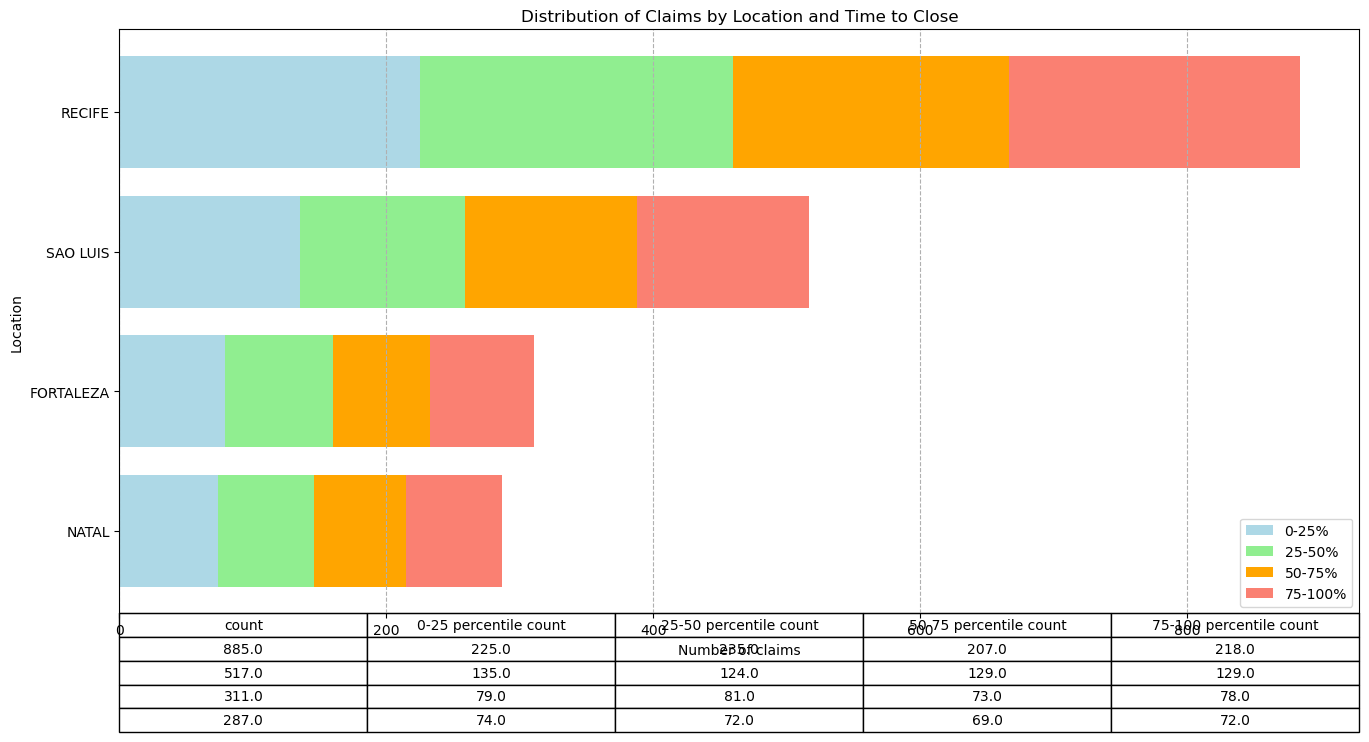

In [45]:
# Calculate the distribution of time to close for each location
distribution = df.groupby('location')['time_to_close'].describe()

# Create empty columns for count within percentile ranges
distribution['0-25 percentile count'] = 0
distribution['25-50 percentile count'] = 0
distribution['50-75 percentile count'] = 0
distribution['75-100 percentile count'] = 0

# Iterate over each location and calculate count within percentile ranges
for location in distribution.index:
    location_data = df.loc[df['location'] == location, 'time_to_close']
    count_0_25 = location_data[location_data <= distribution.loc[location, '25%']].count()
    count_25_50 = location_data[(location_data > distribution.loc[location, '25%']) & (
                location_data <= distribution.loc[location, '50%'])].count()
    count_50_75 = location_data[(location_data > distribution.loc[location, '50%']) & (
                location_data <= distribution.loc[location, '75%'])].count()
    count_75_100 = location_data[location_data > distribution.loc[location, '75%']].count()
    distribution.loc[location, '0-25 percentile count'] = count_0_25
    distribution.loc[location, '25-50 percentile count'] = count_25_50
    distribution.loc[location, '50-75 percentile count'] = count_50_75
    distribution.loc[location, '75-100 percentile count'] = count_75_100

# Calculate the total count of claims per location
distribution['Total count'] = distribution['count']

# Print the resulting distribution with additional columns
print("Distribution of Time to Close per Location:")
print(distribution)

# Sort the distribution DataFrame by the total count in descending order
distribution = distribution.sort_values('Total count', ascending=False)

# Extract the relevant columns for plotting
percentile_columns = ['0-25 percentile count', '25-50 percentile count', '50-75 percentile count', '75-100 percentile count']
percentile_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
location_labels = distribution.index

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Set the colors for the percentile ranges
colors = ['lightblue', 'lightgreen', 'orange', 'salmon']

# Plot the bars for each location
for i, column in enumerate(percentile_columns):
    values = distribution[column]
    ax.barh(location_labels, values, left=distribution[percentile_columns[:i]].sum(axis=1), color=colors[i])

# Set the y-axis label
ax.set_ylabel('Location')

# Set the x-axis label
ax.set_xlabel('Number of claims')

# Set the title
ax.set_title('Distribution of Claims by Location and Time to Close')

# Add a legend
ax.legend(percentile_labels, loc='lower right')

# Display the grid
ax.grid(axis='x', linestyle='--')

# Invert the y-axis to have the locations in descending order
ax.invert_yaxis()

# Create the table
table_data = distribution[['count', '0-25 percentile count', '25-50 percentile count', '50-75 percentile count', '75-100 percentile count']]
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='bottom')

# Set the table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Adjust the subplot to accommodate the table
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()